# Wrangle and Analyze: WeRateDogs

## Intriduction
This project is part of Udacity’s Data Analyst Nanodegree program, and it’s about wrangling and analyzing data. The dataset that I will be wrangling is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

### The method of data wrangling is split into three important sections:
- Gathering data.
- Assessing data.
- Cleaning data.


## Gathering

In [60]:
#Import the necessary libraries
import json
import pandas as pd
import numpy as np
import os
import re
from IPython.display import HTML, display
import requests
import time
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


In [58]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
#Download the image prediction file from the Udacity

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Fetching Additional Data from the Twitter API
>- It takes along time to execute it, so I put this code in a separate python file called: twitter_api.py
>- Use tweepy.py to gather the data, then save it in a file called: tweet_json.txt

In [7]:
#Read the 'tweet_json.txt' file in a dataframe
tweet_json_df = pd.read_json('tweet_json.txt', lines = True)

In [8]:
tweet_json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [10]:
#Create dataframe with the necessary columns
tweets_list = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        
        tweets_list.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
        })
df_tweet = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [11]:
#Save the dataframe 
df_tweet.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [12]:
#Read the'tweet_json.txt' file in dataframe
df_tweet = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

### Assessing 'twitter_archive' DataFrame

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
sum(twitter_archive.duplicated())

0

In [17]:
sum(twitter_archive.tweet_id.isnull())

0

In [18]:
sum(twitter_archive.rating_denominator.isnull())

0

In [19]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Assessing 'image_predictions' DataFrame

In [21]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
sum(image_predictions.jpg_url.duplicated())

66

### Assessing 'df_tweet' DataFrame

In [25]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [26]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [27]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [28]:
sum(df_tweet.tweet_id.duplicated())

0

### Quality Issues

> <b>twitter_archive</b>
1. Delete retweets to keep the original tweets because we want only original ratings that have images.
2. The data type of (tweet_id) column should be converted to string.
3. The data type of (timestamp) column should be converted to date.
4. Remove the rows and columns that we don't need them.
5. The numerator and denominator columns have invalid values.

> <b>image_predictions</b>
1. Remove duplicate in (jpg_url).
2. The data type of (tweet_id) column should be converted to string.
3. Capitalize the first letter of (p1, p2, p3) columns values.
4. p1,p2 and p3 have (_ and -) instead of space.
5. Remove columns that we don't need them.

> <b>df_tweet</b>
1. The data type of (tweet_id) column should be converted to string.

### Tidiness Issues

>1. Merge the three dataframes into one dataframe.
>2. Melt (doggo, floofer, pupper, puppo) columns into one column.

## Cleaning Data

In [29]:
#Copy the dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_tweet_clean = df_tweet.copy()

### Tidiness
<b>Define</b><p>
Merge the three dataframes into one dataframe (twitter_archive_clean).
</p>

<b>Code</b>

In [30]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=df_tweet_clean,
                                 left_on='tweet_id',
                                 right_on='tweet_id',
                                 how='inner')

In [31]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean,
                                                    on='tweet_id',
                                                    how='inner')

<b>Test</b>

In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

<b>Define</b><p>

   Melt (doggo, floofer, pupper, puppo) columns into one column (dog_stage).
</p>

<b>Code</b>

In [33]:
#Select columns to melt
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in twitter_archive_clean.columns.tolist() if x not in melt_columns]

In [34]:
#Melt the columns
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = stay_columns,
                                value_vars = melt_columns, var_name = 'stages',
                                value_name = 'dog_stage')

In [35]:
#Remove column
twitter_archive_clean = twitter_archive_clean.drop('stages', 1)

<b>Test</b>

In [36]:
twitter_archive_clean.dog_stage.value_counts()

None       7959
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

### Quality
<b>Define</b><p>
Remove the rows and columns that we don't need them.
</p>

<b>Code</b>

In [37]:
#Delete the retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

#Delete duplicated tweet_id
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

#Delete tweets without pictures
twitter_archive_clean = twitter_archive_clean.dropna(subset=['jpg_url'])

#Delete another columns we don't need them
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_user_id',
                                                   'retweeted_status_id',
                                                  'retweeted_status_timestamp',
                                                   'in_reply_to_status_id',
                                                   'in_reply_to_user_id'],1)

In [38]:
#Delete the duplicated rows in 'dog_stage' 
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

<b>Test

</b>

In [39]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

In [40]:
twitter_archive_clean.dog_stage.value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

<b>Define</b><p>
Remove 'image predictions' columns.
</p>

<b>Code</b>

In [41]:
#Store and append the first true predection to the 'dog_predication' list
# and the level of confidence appended to 'confidence_level' list 
dog_breed = []
confidence_level = []

def get_prediction(dataframe):
    if dataframe['p1_dog'] == True:
        dog_breed.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        dog_breed.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        dog_breed.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        dog_breed.append('NaN')
        confidence_level.append(0)

twitter_archive_clean.apply(get_prediction, axis=1)
twitter_archive_clean['dog_breed'] = dog_breed
twitter_archive_clean['confidence_level'] = confidence_level

#Delete columns
twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1',
                                                    'p1_conf', 'p1_dog',
                                                    'p2', 'p2_conf',
                                                    'p2_dog', 'p3',
                                                    'p3_conf', 'p3_dog'], 1)

<b>Test</b>

In [42]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'dog_stage',
 'dog_breed',
 'confidence_level']

<b>Define</b><p>
Remove duplicated (jpg_url).
</p>

<b>Code</b>

In [43]:
twitter_archive_clean= twitter_archive_clean.drop_duplicates(subset=['jpg_url'], keep='last')

<b>Test</b>

In [44]:
sum(twitter_archive_clean.jpg_url.duplicated())

0

<b>Define</b><p>
Convert (tweet_id) to string datatype and (timestamp) to datetime datatype.
</p>

<b>Code</b>

In [45]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

<b>Test</b>

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   retweet_count       1994 non-null   int64              
 9   favorite_count      1994 non-null   int64              
 10  jpg_url             1994 non-null   object             
 11  dog_stage           1994 non-null   object             
 12  dog_breed           1994 non-null 

<b>Define</b><p>
Replace the (dog_breed) column values that contain (_ and -) with space.</p>
<ln>Note: dog_breed column was (p1, p2, p3) columns.</ln>

<b>Code</b>

In [47]:
twitter_archive_clean['dog_breed'] = twitter_archive_clean['dog_breed'].str.replace('_', ' ')
twitter_archive_clean['dog_breed'] = twitter_archive_clean['dog_breed'].str.replace('-', ' ')

<b>Test</b>

In [48]:
twitter_archive_clean.dog_breed.sample(20)

1697                           chow
1656                         collie
5649             miniature pinscher
324                           cairn
1673                       Pekinese
1534         Welsh springer spaniel
1491                       Pembroke
1816                Norfolk terrier
60               Labrador retriever
5703                     toy poodle
1015                            NaN
1473    West Highland white terrier
1541                 Great Pyrenees
62                           vizsla
5877                            pug
864                        Cardigan
203              Labrador retriever
1264                     toy poodle
5258             Labrador retriever
1591             Labrador retriever
Name: dog_breed, dtype: object

<b>Define</b><p>
Capitalize the first letter of (dog_breed) column values.</p>
<ln>Note: dog_breed column was (p1, p2, p3) columns.</ln>

<b>Code</b>

In [49]:
def capitalization (dog_pred):
    pred = dog_pred.split(' ')
    pred = [word.capitalize() for word in pred]
    return ' '.join(pred)

twitter_archive_clean.dog_breed = twitter_archive_clean.dog_breed.apply(capitalization)

<b>Test</b>

In [50]:
twitter_archive_clean.dog_breed.sample(20)

5697            Yorkshire Terrier
1775                          Nan
1120                     Airedale
1324    Staffordshire Bullterrier
5870                Border Collie
521             Italian Greyhound
2                       Chihuahua
891            Bedlington Terrier
811                        Borzoi
933               German Shepherd
852                  Bull Mastiff
1876                   Eskimo Dog
4942                      Redbone
1592             Golden Retriever
6737           Labrador Retriever
872                      Malamute
5740                     Pembroke
1924                     Pekinese
387              Golden Retriever
1449                          Nan
Name: dog_breed, dtype: object

## Storing Data

In [51]:
#Store the clean DataFrame 'twitter_archive_clean' in CSV file 
twitter_archive_clean.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')

##  Analyzing and Visualizing Data

In [52]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,dog_breed,confidence_level
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,Nan,0.000000
1,680055455951884288,2015-12-24 16:00:30+00:00,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,8067,18278,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,None,Samoyed,0.995466
2,680070545539371008,2015-12-24 17:00:27+00:00,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,994,2818,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,None,Shih Tzu,0.121811
3,680085611152338944,2015-12-24 18:00:19+00:00,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12,10,by,10034,13959,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,Nan,0.000000
4,680115823365742593,2015-12-24 20:00:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9,10,Ozzy,1028,2972,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,None,Pug,0.999365


In [53]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.280843,10.532096,2766.753260,8895.725677,0.464991
std,6.747816e+16,41.497718,7.320710,4674.698447,12213.193181,0.339470
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,0.000000
25%,6.758475e+17,10.000000,10.000000,624.750000,1982.000000,0.140466
50%,7.084748e+17,11.000000,10.000000,1359.500000,4136.000000,0.459130
75%,7.877873e+17,12.000000,10.000000,3220.000000,11308.000000,0.776387
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,0.999956


In [54]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   retweet_count       1994 non-null   int64  
 9   favorite_count      1994 non-null   int64  
 10  jpg_url             1994 non-null   object 
 11  dog_stage           1994 non-null   object 
 12  dog_breed           1994 non-null   object 
 13  confidence_level    1994 non-null   float64
dtypes: float64(1), int64(5), object(8)
memory usage: 218.2+ KB


In [55]:
df_master['dog_breed'].value_counts()[1:30]

Golden Retriever                  158
Labrador Retriever                108
Pembroke                           95
Chihuahua                          91
Pug                                62
Toy Poodle                         51
Chow                               48
Pomeranian                         42
Samoyed                            42
Malamute                           33
French Bulldog                     31
Chesapeake Bay Retriever           31
Cocker Spaniel                     30
Miniature Pinscher                 25
Eskimo Dog                         22
Cardigan                           21
German Shepherd                    21
Staffordshire Bullterrier          21
Shih Tzu                           20
Siberian Husky                     20
Beagle                             20
Shetland Sheepdog                  19
Rottweiler                         19
Maltese Dog                        19
Kuvasz                             18
Lakeland Terrier                   18
Italian Grey

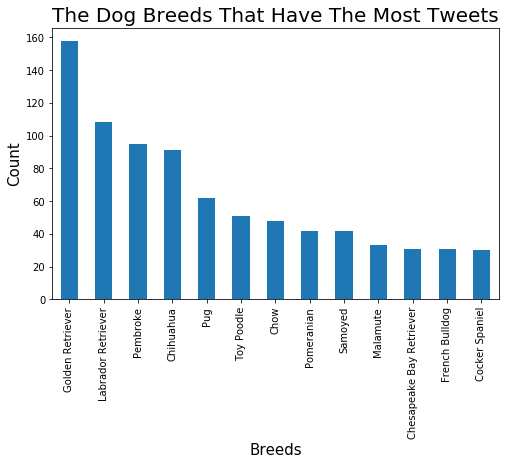

In [56]:
dog_breeds=df_master.groupby('dog_breed').filter(lambda x: 160 > len(x) > 25)
dog_breeds['dog_breed'].value_counts().plot(kind = 'bar', figsize=(8,5))
plt.title('The Dog Breeds That Have The Most Tweets', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Breeds', fontsize=15);
plt.savefig('dog_breeds.png', bbox_inches='tight');

<b>The dog breeds that have the most tweets in order are:</b>
- Golden Retriever
- Labrador Retriever
- Pembroke
- Chihuahua
- Pug
- Toy Poodle
- Chow
- Pomeranian
- Samoyed
- Malamute
- Chesapeake Bay Retriever
- French Bulldog
- Cocker Spaniel

In [55]:
df_master['dog_stage'].value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

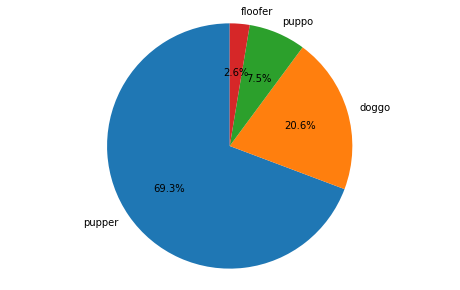

In [56]:
stage_count = list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())
stage_counts = df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()

fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.pie(stage_count, autopct='%1.1f%%', labels = stage_counts, startangle = 90)
ax1.axis('equal')
plt.savefig('dog_stage.png', bbox_inches='tight');

Most of the dogs are pupper (69.3% of dogs are pupper).

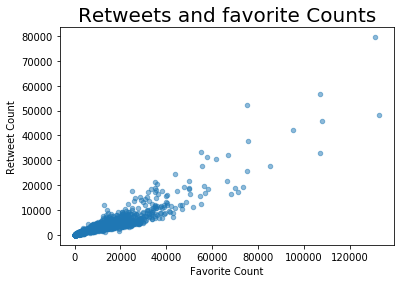

In [57]:
df_master.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Retweets and favorite Counts', fontsize=20);
plt.savefig('retweets_and_favorite.png', bbox_inches='tight');

There is positively correlated between retweet and favorite counts, and it is strong relationship.  